# **1. Perkenalan Dataset**


# Wine Quality Dataset

## Sumber Dataset
**Nama:** Wine Quality Dataset  
**Sumber:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)  
**Link Download:** https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

## Deskripsi Dataset
Dataset ini berisi data kualitas wine merah (Vinho Verde) dari Portugal. Data terdiri dari 11 fitur fisiko-kimia dan 1 target (quality).

## Fitur-fitur:
1. **fixed acidity** - asam tartarat (g/dm³)
2. **volatile acidity** - asam asetat (g/dm³)  
3. **citric acid** - asam sitrat (g/dm³)
4. **residual sugar** - gula residual (g/dm³)
5. **chlorides** - sodium klorida (g/dm³)
6. **free sulfur dioxide** - SO2 bebas (mg/dm³)
7. **total sulfur dioxide** - total SO2 (mg/dm³)
8. **density** - densitas wine (g/cm³)
9. **pH** - tingkat keasaman
10. **sulphates** - kalium sulfat (g/dm³)
11. **alcohol** - persentase alkohol (% vol)

## Target:
- **quality** - skor kualitas (0-10)

## Tujuan:
Membangun model machine learning untuk memprediksi kualitas wine berdasarkan atribut fisiko-kimia.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
# Menghubungkan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/winequality-red.csv'

In [7]:
# Membaca Dataset
data = pd.read_csv(path)

# Menampilkan 5 baris pertama
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
# Mengecek Ukuran Dataset
print("Jumlah baris dan kolom:", data.shape)

Jumlah baris dan kolom: (1599, 12)


In [9]:
# Mengecek Data Duplikat
duplicate_rows = data[data.duplicated()]

print("Jumlah data duplikat:", duplicate_rows.shape[0])

Jumlah data duplikat: 240


In [10]:
# Mengecek Missing Values
print("Jumlah missing values", data.isnull().sum())

Jumlah missing values fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
# Mengecek Struktur Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
display(data.describe(include='all'))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
# Target distribution
print(data['quality'].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [17]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

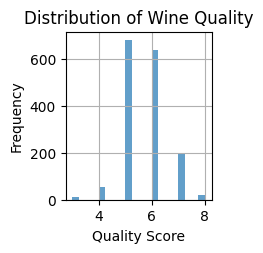

In [19]:
# Distribution of target
plt.subplot(2, 3, 1)
data['quality'].hist(bins=20, alpha=0.7)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

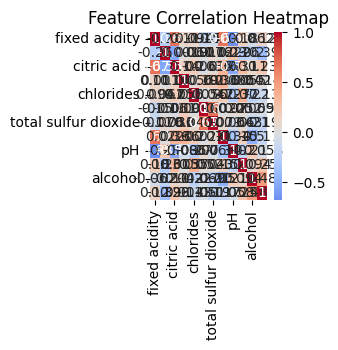

In [21]:
# Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

Text(0.5, 1.0, 'Alcohol Content vs Quality')

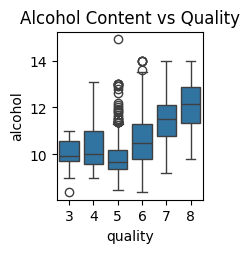

In [23]:
# Alcohol vs Quality
plt.subplot(2, 3, 3)
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Content vs Quality')

Text(0.5, 1.0, 'pH Distribution')

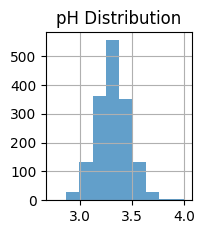

In [24]:
# pH distribution
plt.subplot(2, 3, 4)
data['pH'].hist(alpha=0.7)
plt.title('pH Distribution')

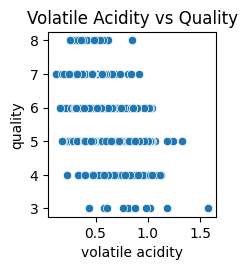

In [25]:
# Volatile acidity vs Quality
plt.subplot(2, 3, 5)
sns.scatterplot(x='volatile acidity', y='quality', data=data)
plt.title('Volatile Acidity vs Quality')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
# Create a copy for preprocessing
df_processed = data.copy()

In [27]:
# Check for missing values
print("Missing values before preprocessing:")
print(df_processed.isnull().sum())

Missing values before preprocessing:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [28]:
# Since wine quality dataset usually has no missing values, we'll handle if any
df_processed = df_processed.fillna(df_processed.median())

In [29]:
# Feature engineering: Create quality categories (binary classification)
df_processed['quality_category'] = df_processed['quality'].apply(
    lambda x: 'good' if x >= 7 else 'bad'
)

In [30]:
# Encode categorical target
le = LabelEncoder()
df_processed['quality_label'] = le.fit_transform(df_processed['quality_category'])

In [31]:
# Feature scaling for numerical features
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid',
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

In [32]:
# Prepare features and target for ML
X = df_processed[numerical_features]
y = df_processed['quality_label']  # Using binary classification target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
print(f"Original data shape: {data.shape}")
print(f"Processed data shape: {df_processed.shape}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Quality distribution in training: {pd.Series(y_train).value_counts()}")
print(f"Quality distribution in test: {pd.Series(y_test).value_counts()}")

Original data shape: (1599, 12)
Processed data shape: (1599, 14)
Training set: (1279, 11)
Test set: (320, 11)
Quality distribution in training: quality_label
0    1105
1     174
Name: count, dtype: int64
Quality distribution in test: quality_label
0    277
1     43
Name: count, dtype: int64


In [34]:
# Save processed data
df_processed.to_csv('wine_quality_processed.csv', index=False)
print("\nProcessed data saved!")


Processed data saved!
